# Evaluating expressions

ImageJ Ops offers a powerful expression evaluation op, built on SciJava's [Parsington](https://github.com/scijava/parsington) library:

Let's get ImageJ ready and prepare an image for demonstration. 

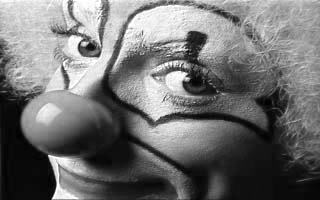

In [1]:
#@ImageJ ij
import net.imglib2.FinalInterval

image = ij.io().open("http://imagej.net/images/clown.png")
w = image.dimension(0); h = image.dimension(1)
slice = FinalInterval.createMinSize(0, 0, 0, w, h, 1)

// crop to only red channel left
grayImage = ij.op().run("crop", image, slice, true)

In [2]:
ij.op().help("eval")

Available operations:
	(Object out) =
	net.imagej.ops.eval.DefaultEval(
		String in,
		Map vars?)

Operators in the expression map to ops as follows:

In [3]:
import net.imagej.ops.eval.OpEvaluator
new OpEvaluator().getOpMap()

Key Value <= logic​.lessThanOrEqual & math​.and < logic​.lessThan != logic​.notEqual * math​.multiply >>> math​.unsignedRightShift == logic​.equal + identity + math​.add && logic​.and || logic​.or >= logic​.greaterThanOrEqual ^ math​.power << math​.leftShift - math​.negate >> math​.rightShift > logic​.greaterThan | math​.or % math​.remainder / math​.divide - math​.subtract

You can also call any op in an `eval` statement as a function, using familiar function syntax.

The following is an example of the `eval` op being used to compute a [Difference of Gaussians](https://en.wikipedia.org/wiki/Difference_of_Gaussians). Inputs within the formula may be accessed via the `Map vars?` argument of the eval function and the key of the map corresponds to the name of the variable that can be used in the formula.

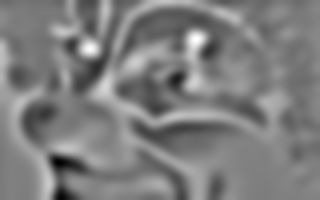

In [4]:
image32 = ij.op().convert().float32(grayImage)
dogFormula = "gauss(image, [10, 10, 1]) - gauss(image, [5, 5, 1])"
dog = ij.op().eval(dogFormula, ["image": image32])